In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

In [9]:
TSLA = yf.Ticker("TSLA")

hist = TSLA.history(period="max")
hist = pd.DataFrame(hist)
hist["daily_change"] = hist.Close.pct_change()

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_change
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0,-0.002512
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0,-0.078472
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0,-0.125683
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0,-0.160938
...,...,...,...,...,...,...,...,...
2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0,-0.064165
2022-05-23,655.020020,679.960022,638.059998,674.900024,29634500,0,0.0,0.016569
2022-05-24,653.530029,653.919983,620.570007,628.159973,29697500,0,0.0,-0.069255


In [10]:

mean = np.mean(hist.daily_change)
std = np.std(hist.daily_change)
print(mean)
print(std)


0.002304589521437882
0.03579305950569668


In [11]:
portfolio_amount = 100
portfolio_value = portfolio_amount * hist.Close[-1]
print(portfolio_amount)
print(portfolio_value)

100
70772.998046875


In [14]:
confidence_level = 0.95

VaR_pct = norm.ppf(confidence_level, loc=mean, scale=std)
VaR = portfolio_value * VaR_pct

print(VaR)

4329.8165247619945


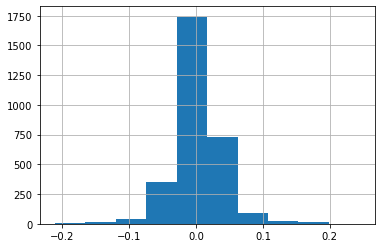

In [16]:
hist.daily_change.hist()

# given random variable X (house price) with population muy = 60, sigma = 40
import scipy as sc
import scipy.stats as sct
sc.version.full_version # 0.15.1

#a. Find P(X<50)
sct.norm.cdf(x=50,loc=60,scale=40) # 0.4012936743170763

#b. Find P(X>=50)
sct.norm.sf(x=50,loc=60,scale=40) # 0.5987063256829237

#c. Find P(60<=X<=80)
sct.norm.cdf(x=80,loc=60,scale=40) - sct.norm.cdf(x=60,loc=60,scale=40)

#d. how much top most 5% expensive house cost at least? or find x where P(X>=x) = 0.05
sct.norm.isf(q=0.05,loc=60,scale=40)

#e. how much top most 5% cheapest house cost at least? or find x where P(X<=x) = 0.05
sct.norm.ppf(q=0.05,loc=60,scale=40)
Share
Follow